# Análisis de Crímenes 2024

Este notebook contiene el análisis exploratorio de datos sobre crímenes reportados en 2024.

## Importación de Librerías

Importamos las bibliotecas necesarias para el análisis de datos:

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


sns.set_theme(style='whitegrid')

df = pd.read_csv('lib/Crimes_-_2024_20251122.csv')


print("Primeras 5 filas del dataset:")
display(df.head())
print('Data shape (filas, columnas)',df.shape)

print("Data types", df.dtypes)

columns = df.columns.tolist()
print("columns", columns)

print("Number of missing values (total):", df.isna().sum())
print("Number of columns with missing values:", (df.isna().any(axis=0)).sum())
print("Number of rows with missing values:", (df.isna().any(axis=1)).sum())


#todo - mapper object to camelCase columns
primary_col = "Primary Type"
location_description_col = "Location Description"
location_col = "Location"
arrest_col = "Arrest"



Primeras 5 filas del dataset:


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817.0,1860189.0,2024,11/02/2025 03:41:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661.0,1873623.0,2024,05/17/2025 03:40:52 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740.0,1853048.0,2024,11/02/2025 03:41:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362.0,1861188.0,2024,11/02/2025 03:41:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458.0,1907694.0,2024,05/17/2025 03:40:52 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


Data shape (filas, columnas) (258829, 22)
Data types ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
columns ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',

## Análisis de Tipos de Datos

A continuación se muestra una tabla detallada de los tipos de datos para cada columna del dataset:

In [432]:
# Tabla simple: id (nombre de la columna) y tipo_de_dato (dtype)
tipos_tabla = pd.DataFrame({
    'id': df.columns.tolist(),
    'tipo_de_dato': [str(df[col].dtype) for col in df.columns]
})

print("\nTabla con id y tipo de dato:")
display(tipos_tabla)


Tabla con id y tipo de dato:


,id,tipo_de_dato
0,ID,int64
1,Case Number,object
2,Date,object
3,Block,object
4,IUCR,object
5,Primary Type,object
6,Description,object
7,Location Description,object
8,Arrest,bool
9,Domestic,bool


Grafica de crimenes

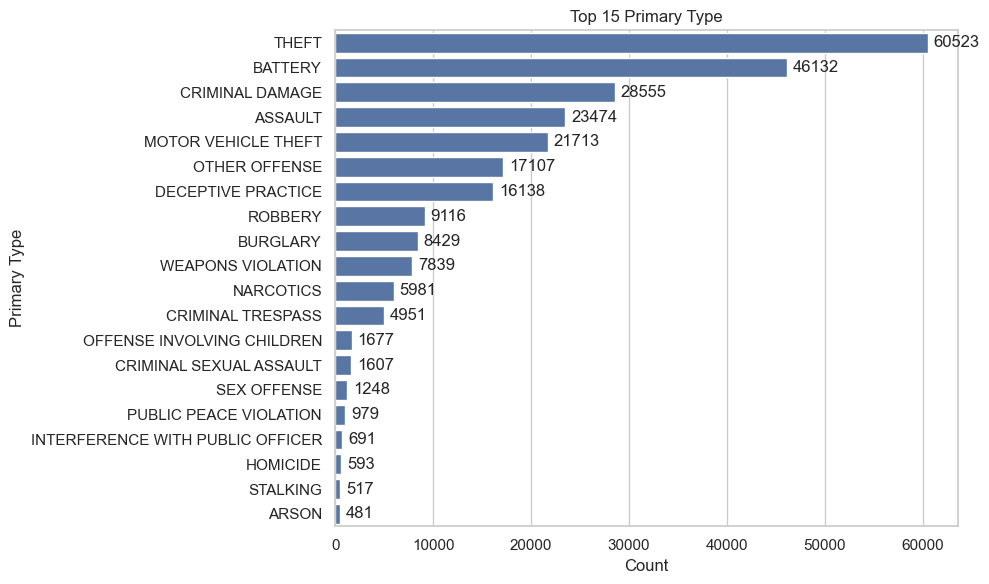

In [433]:
# crimenes
if primary_col in df.columns:
    pc = df[primary_col].fillna('Unknown')
    top = pc.value_counts().head(20)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top.values, y=top.index )
    plt.xlabel('Count')
    plt.title(f'Top 15 {primary_col}')
 
    for i, v in enumerate(top.values):
        plt.text(v + max(top.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'primary type'. Columnas disponibles:", list(df.columns))


Locations Description

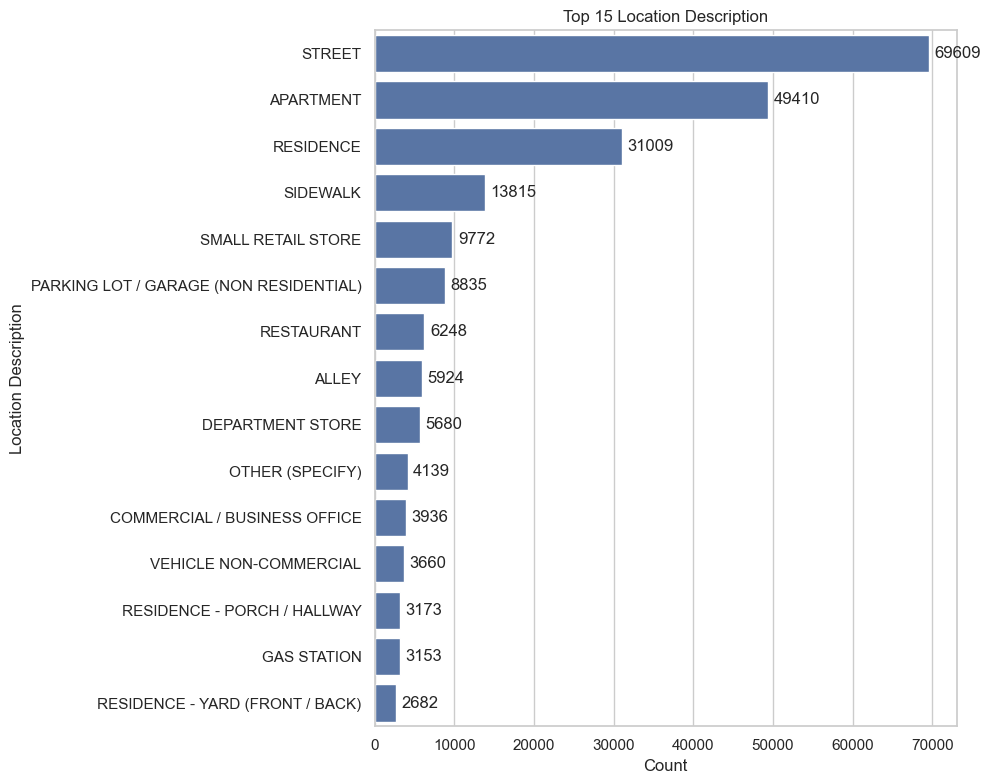

In [434]:
# locations_description
if location_description_col in df.columns:
    lc = df[location_description_col].fillna('Unknown')
    top_loc = lc.value_counts().head(15)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_loc.values, y=top_loc.index)
    plt.xlabel('Count')
    plt.title(f'Top 15 {location_description_col}')
    for i, v in enumerate(top_loc.values):
        plt.text(v + max(top_loc.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'location description'. Columnas disponibles:", list(df.columns))

Location col (coordenadas)

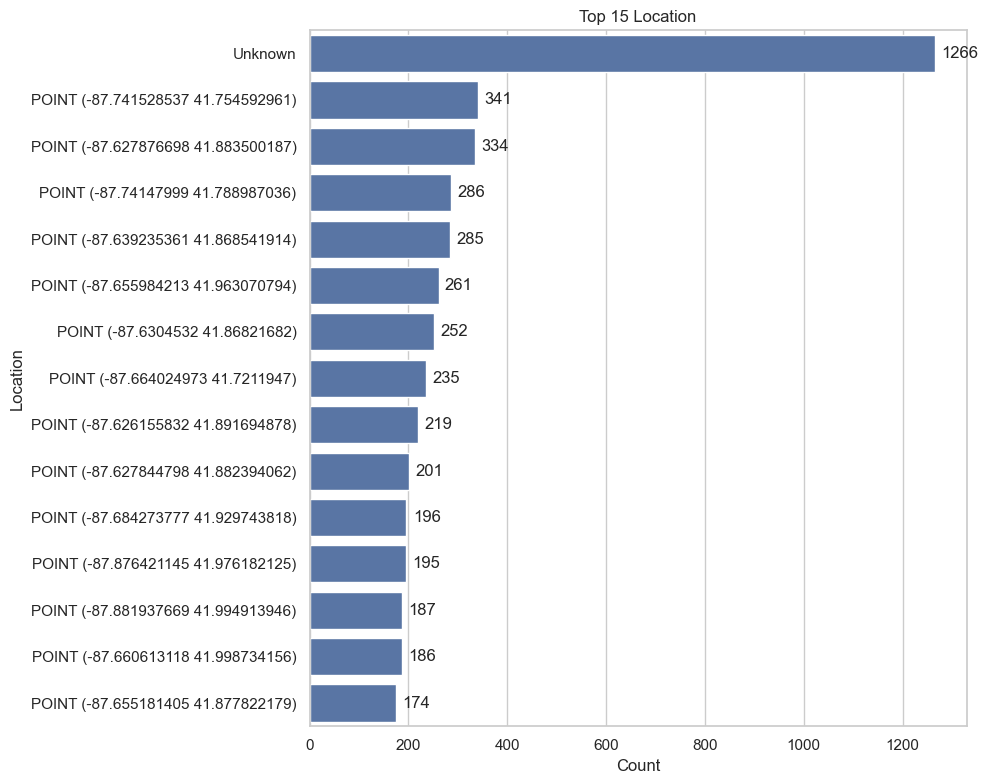

In [435]:
if location_col in df.columns:
    lc = df[location_col].fillna('Unknown')
    top_loc = lc.value_counts().head(15)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_loc.values, y=top_loc.index)
    plt.xlabel('Count')
    plt.title(f'Top 15 {location_col}')
    for i, v in enumerate(top_loc.values):
        plt.text(v + max(top_loc.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'location'. Columnas disponibles:", list(df.columns))

Arrestos

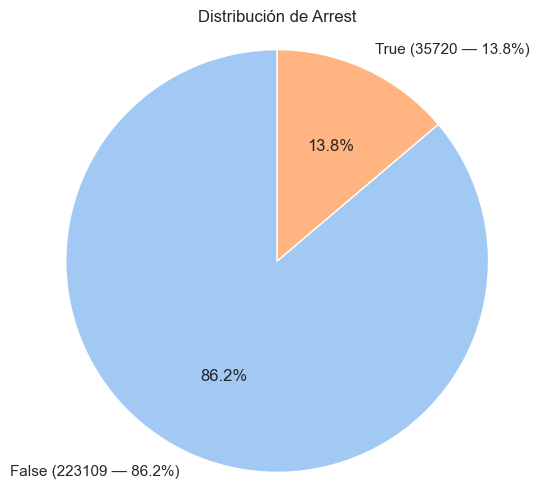

Conteos de arrest: Arrest
False    223109
True      35720
Name: count, dtype: int64


In [436]:
# distribucion de arrestos
if arrest_col in df.columns:
    ac = df[arrest_col].fillna('Unknown')
    counts = ac.value_counts(dropna=False)
    plt.figure(figsize=(6,6))
    labels = counts.index.astype(str)
    sizes = counts.values
    # Pie con etiquetas que contienen conteo y porcentaje
    plt.pie(sizes, labels=[f"{l} ({v} — {v/sizes.sum():.1%})" for l,v in zip(labels,sizes)],
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Distribución de {arrest_col}')
    plt.axis('equal')
    plt.show()
    print('Conteos de arrest:', counts)
else:
    print("No se encontró columna para 'arrest'. Columnas disponibles:", list(df.columns))

#### Limpieza de los datos (Alejandro y Julia)

In [437]:
# duplicados en columna id
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]


In [438]:
# Esto está bien - solo estás MIRANDO, no transformando
df.groupby('Primary Type')['Arrest'].mean().sort_values()
df.groupby('Location Description')['Arrest'].mean().sort_values()
df.groupby('Domestic')['Arrest'].mean()

# Ver cardinalidad
print(df['District'].nunique())  # ¿Cuántos distritos hay?
print(df['Beat'].nunique())  # ¿Cuántos beats?

# 1. Ver cardinalidad
print(f"IUCR únicos: {df['IUCR'].nunique()}")
print(f"FBI Code únicos: {df['FBI Code'].nunique()}")
print(f"Primary Type únicos: {df['Primary Type'].nunique()}")

# 2. Ver si IUCR y FBI Code son redundantes
redundancia = df.groupby('IUCR')['FBI Code'].nunique()
print(f"\n¿Son redundantes IUCR y FBI Code?")
print(f"Promedio de FBI Codes por IUCR: {redundancia.mean()}")
# Si es ~1.0, son redundantes

# 3. Ver distribución de arrestos
print("\nTasa de arresto por IUCR (top 10):")
print(df.groupby('IUCR')['Arrest'].mean().sort_values(ascending=False).head(10))

23
275
IUCR únicos: 340
FBI Code únicos: 26
Primary Type únicos: 31

¿Son redundantes IUCR y FBI Code?
Promedio de FBI Codes por IUCR: 1.0

Tasa de arresto por IUCR (top 10):
IUCR
4860    1.0
4740    1.0
4625    1.0
3920    1.0
3910    1.0
3000    1.0
2230    1.0
2110    1.0
2095    1.0
2094    1.0
Name: Arrest, dtype: float64


In [439]:
# duplicados en Case Number
df[df['Case Number'].duplicated(keep='last')]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12138,28521,JH539697,12/12/2024 03:40:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
18445,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18446,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
30954,28482,JH505655,11/12/2024 10:37:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
36030,28470,JH496538,11/05/2024 02:40:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
36409,28468,JH495872,11/04/2024 09:30:00 PM,080XX S INGLESIDE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,8,44,01A,1183960.0,1851854.0,2024,11/12/2024 03:41:00 PM,41.748665,-87.601475,POINT (-87.601474713 41.748665338)
56490,28414,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
101412,28306,JH380746,08/08/2024 10:28:00 PM,034XX W DOUGLAS BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,24,29,01A,1153696.0,1893244.0,2024,08/16/2024 03:41:00 PM,41.862898,-87.711276,POINT (-87.711275792 41.862898145)
105401,28297,JH373821,08/03/2024 07:10:00 PM,048XX S WINCHESTER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,15,61,01A,1164171.0,1872522.0,2024,01/26/2025 03:40:46 PM,41.805820,-87.673408,POINT (-87.673407538 41.805820086)
111997,28285,JH362433,07/26/2024 12:06:00 PM,025XX W 46TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,15,58,01A,1160088.0,1874086.0,2024,08/03/2024 03:40:46 PM,41.810197,-87.688339,POINT (-87.688339453 41.810196952)


29 registros duplicados con el mismo "Case Number". Estos son los casos de Homicidio, el cual se especifica en la pagina web de la policia de Chicago que para los homicidios se ingresan por victimas, por ejemplo, una masacre.

In [440]:
# Agrupar por Case Number y verificar si todos los valores de Arrest son iguales
duplicados = df[df['Case Number'].duplicated(keep=False)]
verificacion = duplicados.groupby('Case Number')['Arrest'].apply(lambda x: x.nunique() == 1)

# Ver cuántos tienen valores diferentes
print(f"Case Numbers con valores iguales en Arrest: {verificacion.sum()}")
print(f"Case Numbers con valores diferentes en Arrest: {(~verificacion).sum()}")

# Ver los casos donde Arrest es diferente
casos_diferentes = verificacion[~verificacion].index
df[df['Case Number'].isin(casos_diferentes)].sort_values('Case Number')[['Case Number', 'Arrest', 'ID', 'Date']]

Case Numbers con valores iguales en Arrest: 24
Case Numbers con valores diferentes en Arrest: 1


,Case Number,Arrest,ID,Date
220207,JH166819,False,28002,02/28/2024 04:08:00 PM
221535,JH166819,True,27997,02/26/2024 05:55:00 PM


Se encontro solamente un caso en el que para el mismo Case Number la variable de Arrest sea diferente. Lo cual no afecta significativamente la limpieza de los datos

In [441]:
df[df.duplicated(subset=df.columns.difference(['ID']), keep=False)]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
18445,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18446,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
56490,28414,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
56491,28415,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
128182,28235,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,10,46,01A,1202185.0,1848046.0,2024,10/23/2025 03:45:36 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
128183,28236,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,10,46,01A,1202185.0,1848046.0,2024,10/23/2025 03:45:36 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
137524,28199,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9,53,01A,1173228.0,1823102.0,2024,07/22/2025 03:42:18 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
137525,28198,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9,53,01A,1173228.0,1823102.0,2024,07/22/2025 03:42:18 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
156342,28148,JH284448,05/30/2024 02:16:00 AM,028XX S SACRAMENTO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,25,30,01A,1156822.0,1885102.0,2024,06/07/2024 03:41:01 PM,41.840493,-87.700021,POINT (-87.700020957 41.840492863)
156343,28147,JH284448,05/30/2024 02:16:00 AM,028XX S SACRAMENTO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,25,30,01A,1156822.0,1885102.0,2024,06/07/2024 03:41:01 PM,41.840493,-87.700021,POINT (-87.700020957 41.840492863)


Vemos que hay 8 registros exactamente iguales sin considerar la columna unica de "ID"

In [442]:
# Ordenar por Case Number y Date descendente (fecha más reciente arriba)
df_sorted = df.sort_values(by=['Case Number', 'Date'], ascending=[True, False])

# Mantener solo el primer registro por Case Number (la más reciente)
df_no_case_duplicates = df_sorted.drop_duplicates(subset='Case Number', keep='first')

In [443]:
# Eliminar duplicados exactos
df_cleaned = df_no_case_duplicates.drop_duplicates(subset='Case Number', keep='first')

In [444]:
print("Registros originales:", len(df))
print("Después de limpiar Case Number:", len(df_no_case_duplicates))
print("Después de eliminar duplicados exactos:", len(df_cleaned))

Registros originales: 258829
Después de limpiar Case Number: 258800
Después de eliminar duplicados exactos: 258800


### Analis de Nulos

In [445]:
df_cleaned.isna()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
205292,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
222592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
176695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
69054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
81476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [446]:
#Proporcion de valores nules en cada columna
df_cleaned.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1096
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            1266
Y Coordinate            1266
Year                       0
Updated On                 0
Latitude                1266
Longitude               1266
Location                1266
dtype: int64

In [447]:
# Calcular la proporción de valores nulos en cada columna
df_cleaned.isna().mean().round(4) * 100

ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.42
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    0.00
Community Area          0.00
FBI Code                0.00
X Coordinate            0.49
Y Coordinate            0.49
Year                    0.00
Updated On              0.00
Latitude                0.49
Longitude               0.49
Location                0.49
dtype: float64

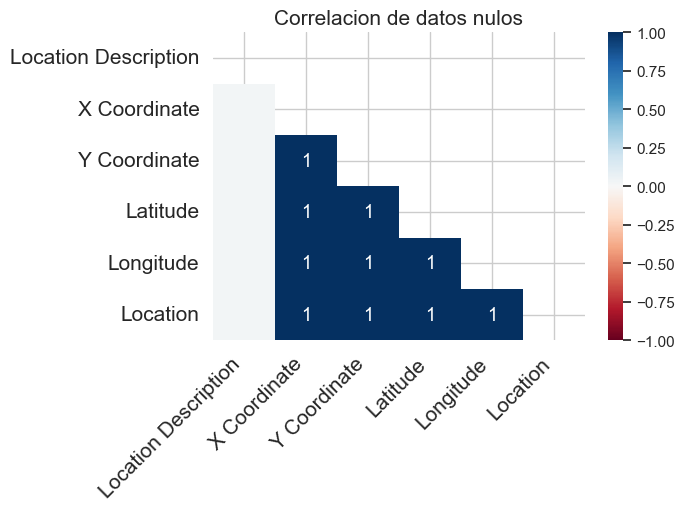

In [448]:
msno.heatmap(df_cleaned, fontsize=15, figsize=(6,4))
plt.title("Correlacion de datos nulos", fontsize=15)
plt.show()

Este grafico de correlacion nos dice que los valores relacionados a ubicacion del crimen son nulos si uno de los otros son nulos. Es decir, son MAR

In [449]:
#Analisis de location description
df["LocDesc_is_null"] = df["Location Description"].isna().astype(int)

location_numeric = ["Beat", "District", "Ward", "Community Area", "LocDesc_is_null"]

df[location_numeric].corr()

,Beat,District,Ward,Community Area,LocDesc_is_null
Beat,1.000000,0.999816,0.652652,-0.478653,0.016253
District,0.999816,1.000000,0.653493,-0.478886,0.016259
Ward,0.652652,0.653493,1.000000,-0.541497,0.021085
Community Area,-0.478653,-0.478886,-0.541497,1.000000,-0.025731
LocDesc_is_null,0.016253,0.016259,0.021085,-0.025731,1.000000


In [450]:
pd.crosstab(df["Location Description"], df["Primary Type"])

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,8,3,9,21,0,23,6,16,3,0,...,0,7,0,0,2,6,1,0,20,3
AIRCRAFT,0,3,21,0,0,1,0,0,4,0,...,0,1,0,0,4,0,0,0,19,0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0,9,14,0,0,4,1,5,34,0,...,0,2,0,0,0,0,0,0,24,1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0,2,7,0,1,1,0,0,2,0,...,0,6,0,0,0,1,0,1,37,0
AIRPORT EXTERIOR - NON-SECURE AREA,0,8,13,1,0,9,2,5,14,0,...,0,6,0,0,9,1,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEHICLE - DELIVERY TRUCK,0,0,2,2,0,4,0,2,2,0,...,0,0,0,0,0,2,0,0,31,0
"VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",0,8,30,0,0,4,0,0,19,0,...,0,2,1,0,0,11,5,0,35,4
VEHICLE NON-COMMERCIAL,21,100,399,68,4,541,21,37,36,0,...,0,144,0,0,7,91,15,1,1245,144


In [451]:
pd.crosstab(df["Location Description"], df["Primary Type"], normalize="index")

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,0.053333,0.020000,0.060000,0.140000,0.000000,0.153333,0.040000,0.106667,0.020000,0.0,...,0.0,0.046667,0.000000,0.0,0.013333,0.040000,0.006667,0.000000,0.133333,0.020000
AIRCRAFT,0.000000,0.052632,0.368421,0.000000,0.000000,0.017544,0.000000,0.000000,0.070175,0.0,...,0.0,0.017544,0.000000,0.0,0.070175,0.000000,0.000000,0.000000,0.333333,0.000000
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.000000,0.085714,0.133333,0.000000,0.000000,0.038095,0.009524,0.047619,0.323810,0.0,...,0.0,0.019048,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.228571,0.009524
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.000000,0.033333,0.116667,0.000000,0.016667,0.016667,0.000000,0.000000,0.033333,0.0,...,0.0,0.100000,0.000000,0.0,0.000000,0.016667,0.000000,0.016667,0.616667,0.000000
AIRPORT EXTERIOR - NON-SECURE AREA,0.000000,0.076190,0.123810,0.009524,0.000000,0.085714,0.019048,0.047619,0.133333,0.0,...,0.0,0.057143,0.000000,0.0,0.085714,0.009524,0.000000,0.000000,0.238095,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEHICLE - DELIVERY TRUCK,0.000000,0.000000,0.042553,0.042553,0.000000,0.085106,0.000000,0.042553,0.042553,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.042553,0.000000,0.000000,0.659574,0.000000
"VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",0.000000,0.064516,0.241935,0.000000,0.000000,0.032258,0.000000,0.000000,0.153226,0.0,...,0.0,0.016129,0.008065,0.0,0.000000,0.088710,0.040323,0.000000,0.282258,0.032258
VEHICLE NON-COMMERCIAL,0.005738,0.027322,0.109016,0.018579,0.001093,0.147814,0.005738,0.010109,0.009836,0.0,...,0.0,0.039344,0.000000,0.0,0.001913,0.024863,0.004098,0.000273,0.340164,0.039344


In [452]:
pd.crosstab(df["Primary Type"], df["LocDesc_is_null"], normalize="index")


LocDesc_is_null,0,1
Primary Type,,
ARSON,1.000000,0.000000
ASSAULT,0.999915,0.000085
BATTERY,1.000000,0.000000
BURGLARY,0.999881,0.000119
CONCEALED CARRY LICENSE VIOLATION,1.000000,0.000000
CRIMINAL DAMAGE,1.000000,0.000000
CRIMINAL SEXUAL ASSAULT,1.000000,0.000000
CRIMINAL TRESPASS,1.000000,0.000000
DECEPTIVE PRACTICE,0.932272,0.067728


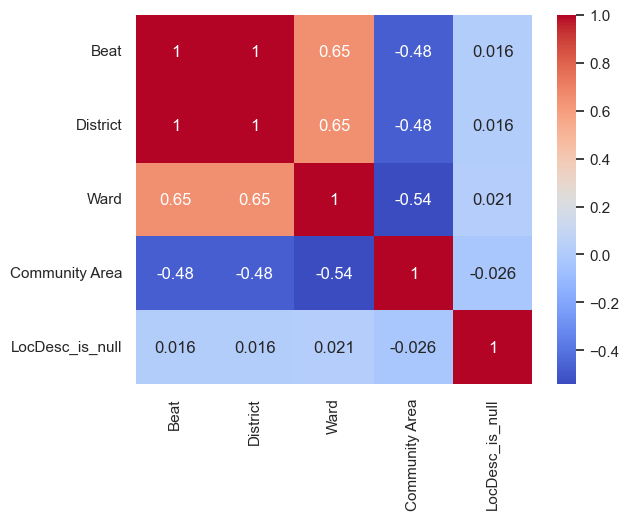

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[location_numeric].corr(), annot=True, cmap="coolwarm")
plt.show()


Las variables de location son MAR. Los nulos de coordenadas siempre vienen juntos. Si no hay ubicacion exacta, se dejan vacios los demas campos pertinentes

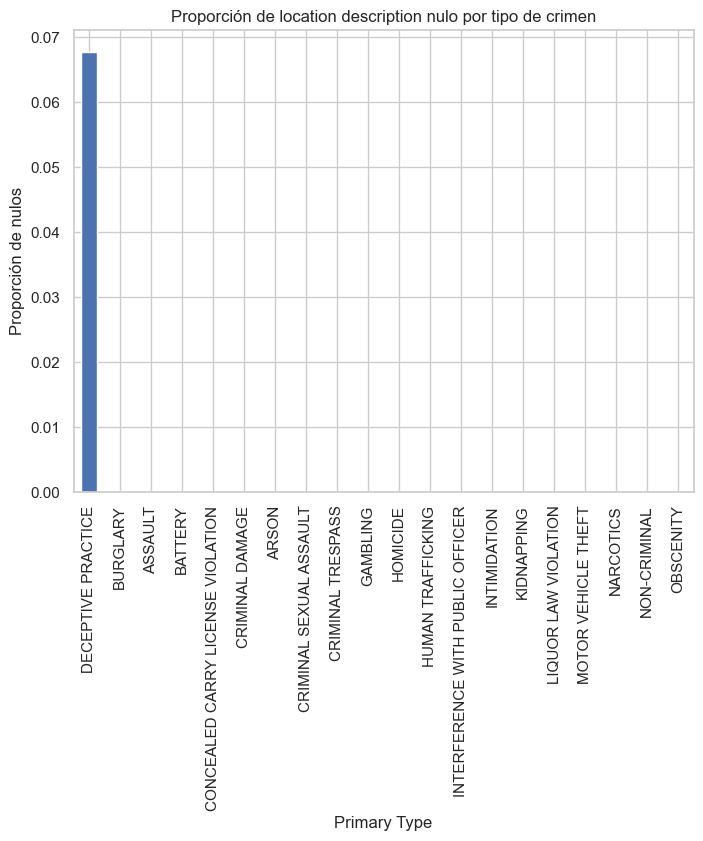

In [454]:
null_rate = df.groupby('Primary Type')['LocDesc_is_null'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
null_rate.head(20).plot(kind='bar')
plt.ylabel("Proporción de nulos")
plt.title("Proporción de location description nulo por tipo de crimen")
plt.show()

In [455]:
# Supongamos que tu DataFrame se llama df
# Filtramos los casos donde cualquiera de las columnas de interés es nula
cols_de_interes = ['Location Description', 'Latitude', 'Longitude', 'Location', 'X Coordinate', 'Y Coordinate']
df_nulos = df[df[cols_de_interes].isnull().any(axis=1)]

# Agrupamos por 'Primary Type' para ver qué tipos de crímenes tienen valores nulos en esas columnas
nulos_por_tipo = df_nulos.groupby('Primary Type')[cols_de_interes].apply(lambda x: x.isnull().sum())

# Mostrar el resultado
print(nulos_por_tipo)


                                  Location Description  Latitude  Longitude  \
Primary Type                                                                  
ARSON                                                0         2          2   
ASSAULT                                              2        96         96   
BATTERY                                              0       174        174   
BURGLARY                                             1        32         32   
CRIMINAL DAMAGE                                      0       106        106   
CRIMINAL SEXUAL ASSAULT                              0        29         29   
CRIMINAL TRESPASS                                    0        29         29   
DECEPTIVE PRACTICE                                1093       238        238   
HOMICIDE                                             0         1          1   
INTERFERENCE WITH PUBLIC OFFICER                     0         4          4   
INTIMIDATION                                        

Tipo de nulos en variable location description: Los nulos dependen claramente del tipo de crimen, en particular de DECEPTIVE PRACTICE, un grupo dominado por delitos como fraude, estafas y transacciones engañosas, que muchas veces no tienen un “lugar físico identificable”.

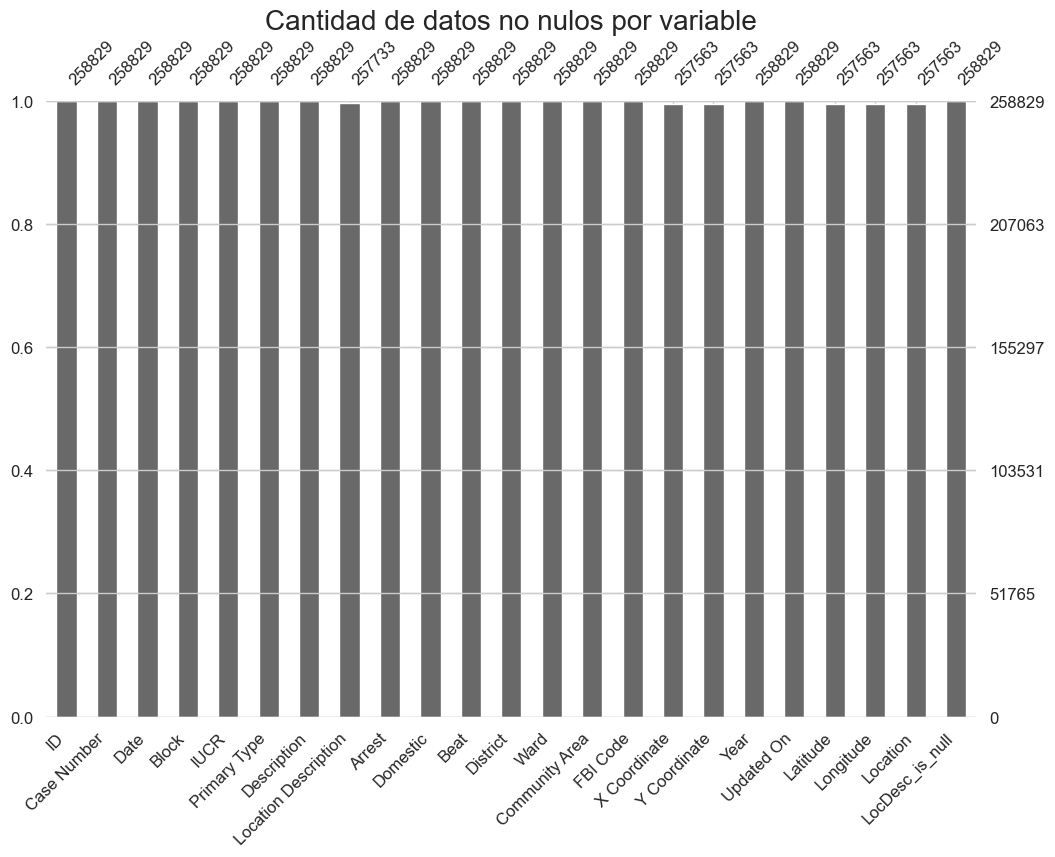

In [456]:
msno.bar(df, fontsize=12, figsize=(12,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

Porcentaje de nulos: 0.42%

--- Analizando Arrest ---
Media con dato: 0.139
Media sin dato: 0.000
P-value: 0.0000 *SIGNIFICATIVO*

--- Analizando Domestic ---
Media con dato: 0.185
Media sin dato: 0.001
P-value: 0.0000 *SIGNIFICATIVO*

--- Analizando Primary Type ---
Primary Type          ARSON  ASSAULT  BATTERY  BURGLARY  \
Location Description                                      
False                  0.19     9.11     17.9      3.27   
True                   0.00     0.18      0.0      0.09   

Primary Type          CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Location Description                                                       
False                                              0.08            11.08   
True                                               0.00             0.00   

Primary Type          CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
Location Description                                               
False                                    0.62         

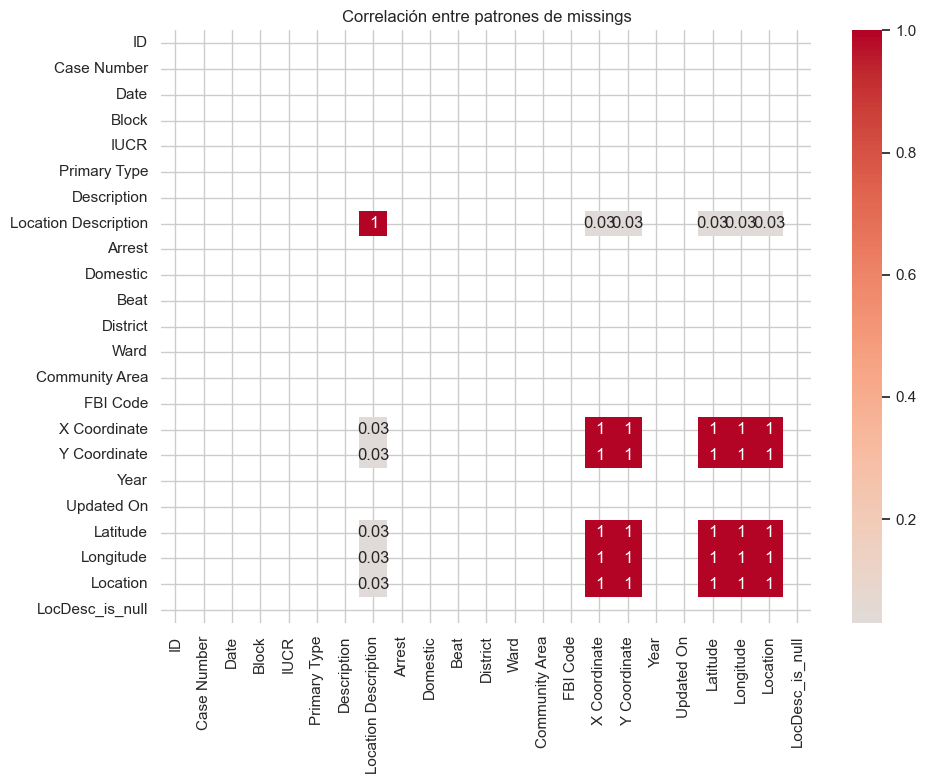


Nulos por Primary Type:
Primary Type
ARSON                                   0
ASSAULT                                 2
BATTERY                                 0
BURGLARY                                1
CONCEALED CARRY LICENSE VIOLATION       0
CRIMINAL DAMAGE                         0
CRIMINAL SEXUAL ASSAULT                 0
CRIMINAL TRESPASS                       0
DECEPTIVE PRACTICE                   1093
GAMBLING                                0
HOMICIDE                                0
HUMAN TRAFFICKING                       0
INTERFERENCE WITH PUBLIC OFFICER        0
INTIMIDATION                            0
KIDNAPPING                              0
LIQUOR LAW VIOLATION                    0
MOTOR VEHICLE THEFT                     0
NARCOTICS                               0
NON-CRIMINAL                            0
OBSCENITY                               0
OFFENSE INVOLVING CHILDREN              0
OTHER NARCOTIC VIOLATION                0
OTHER OFFENSE                         

In [457]:
# 1. ANÁLISIS BÁSICO: Ver patrón de missings
columna = 'Location Description'  # Cambia por tu columna de interés

print(f"Porcentaje de nulos: {df[columna].isna().sum() / len(df) * 100:.2f}%")

# 2. COMPARAR OTRAS VARIABLES cuando hay/no hay nulos
# Si no hay diferencias significativas en otras variables -> posible MCAR
# Si hay diferencias -> posible MAR o MNAR

variables_comparar = ['Arrest', 'Domestic', 'Primary Type', 'District']

for var in variables_comparar:
    print(f"\n--- Analizando {var} ---")
    
    if df[var].dtype in ['int64', 'float64', 'bool']:
        # Variable numérica/booleana
        con_dato = df[df[columna].notna()][var]
        sin_dato = df[df[columna].isna()][var]
        
        print(f"Media con dato: {con_dato.mean():.3f}")
        print(f"Media sin dato: {sin_dato.mean():.3f}")
        
        # Test estadístico
        if len(con_dato) > 0 and len(sin_dato) > 0:
            stat, p_value = stats.ttest_ind(con_dato.dropna(), sin_dato.dropna())
            print(f"P-value: {p_value:.4f} {'*SIGNIFICATIVO*' if p_value < 0.05 else ''}")
    else:
        # Variable categórica
        tabla = pd.crosstab(df[columna].isna(), df[var], normalize='index') * 100
        print(tabla.round(2))

# 3. MATRIZ DE CORRELACIÓN DE MISSINGS
# Ver si los nulos de una columna se relacionan con nulos de otras
import matplotlib.pyplot as plt
import seaborn as sns

missings_df = df.isna()
correlacion_missings = missings_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_missings, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre patrones de missings')
plt.tight_layout()
plt.show()

# 4. ANÁLISIS POR GRUPOS
# Ver si ciertos grupos tienen más nulos
print("\nNulos por Primary Type:")
print(df.groupby('Primary Type')[columna].apply(lambda x: x.isna().sum()))

print("\nNulos por District:")
print(df.groupby('District')[columna].apply(lambda x: x.isna().sum()))

In [458]:
# 1. IDENTIFICAR TODAS LAS COLUMNAS CON NULOS
print("="*60)
print("RESUMEN DE NULOS EN EL DATASET")
print("="*60)

nulos_resumen = df.isnull().sum()
nulos_resumen = nulos_resumen[nulos_resumen > 0].sort_values(ascending=False)
nulos_porcentaje = (nulos_resumen / len(df) * 100).round(2)

resumen_df = pd.DataFrame({
    'Cantidad Nulos': nulos_resumen,
    '% Nulos': nulos_porcentaje
})
print(resumen_df)

# 2. ANÁLISIS DETALLADO POR CADA VARIABLE CON NULOS
variables_con_nulos = nulos_resumen.index.tolist()

print("\n" + "="*60)
print("ANÁLISIS DETALLADO POR VARIABLE")
print("="*60)

for columna in variables_con_nulos:
    print(f"\n{'='*60}")
    print(f"VARIABLE: {columna}")
    print(f"{'='*60}")
    print(f"Nulos: {nulos_resumen[columna]} ({nulos_porcentaje[columna]}%)")
    
    # Test 1: Relación con Arrest
    print(f"\n--- Relación con ARREST ---")
    arrest_nulos = df.groupby('Arrest')[columna].apply(lambda x: x.isna().sum())
    arrest_total = df.groupby('Arrest').size()
    arrest_pct = (arrest_nulos / arrest_total * 100).round(2)
    
    result_arrest = pd.DataFrame({
        'Nulos': arrest_nulos,
        'Total': arrest_total,
        '% Nulos': arrest_pct
    })
    print(result_arrest)
    
    # Test estadístico
    con_arrest = df[df['Arrest'] == True][columna].isna()
    sin_arrest = df[df['Arrest'] == False][columna].isna()
    from scipy.stats import chi2_contingency
    
    tabla_contingencia = pd.crosstab(df['Arrest'], df[columna].isna())
    chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
    print(f"Chi-cuadrado p-value: {p_value:.6f} {'***SIGNIFICATIVO***' if p_value < 0.001 else '**SIGNIFICATIVO**' if p_value < 0.01 else '*Significativo*' if p_value < 0.05 else 'No significativo'}")
    
    # Test 2: Relación con Primary Type (top 5)
    print(f"\n--- Relación con PRIMARY TYPE (Top 5 con más nulos) ---")
    nulos_por_tipo = df.groupby('Primary Type')[columna].apply(
        lambda x: x.isna().sum()
    ).sort_values(ascending=False).head(5)
    
    total_por_tipo = df.groupby('Primary Type').size()
    pct_por_tipo = (nulos_por_tipo / total_por_tipo[nulos_por_tipo.index] * 100).round(2)
    
    result_tipo = pd.DataFrame({
        'Nulos': nulos_por_tipo,
        '% del tipo': pct_por_tipo
    })
    print(result_tipo)
    
    # Test 3: Relación con Domestic
    print(f"\n--- Relación con DOMESTIC ---")
    domestic_nulos = df.groupby('Domestic')[columna].apply(lambda x: x.isna().sum())
    domestic_total = df.groupby('Domestic').size()
    domestic_pct = (domestic_nulos / domestic_total * 100).round(2)
    
    result_domestic = pd.DataFrame({
        'Nulos': domestic_nulos,
        'Total': domestic_total,
        '% Nulos': domestic_pct
    })
    print(result_domestic)
    
    # Test 4: ¿Los nulos ocurren juntos con otros nulos?
    print(f"\n--- Correlación con nulos de otras variables ---")
    correlaciones = []
    for otra_col in variables_con_nulos:
        if otra_col != columna:
            corr = df[columna].isna().astype(int).corr(df[otra_col].isna().astype(int))
            if abs(corr) > 0.1:  # Solo mostrar correlaciones relevantes
                correlaciones.append((otra_col, corr))
    
    if correlaciones:
        correlaciones.sort(key=lambda x: abs(x[1]), reverse=True)
        for otra_col, corr in correlaciones[:5]:  # Top 5
            print(f"  {otra_col}: {corr:.3f}")
    else:
        print("  No hay correlaciones significativas (>0.1)")

print("\n" + "="*60)
print("RESUMEN DE CLASIFICACIÓN")
print("="*60)

RESUMEN DE NULOS EN EL DATASET
                      Cantidad Nulos  % Nulos
X Coordinate                    1266     0.49
Y Coordinate                    1266     0.49
Longitude                       1266     0.49
Latitude                        1266     0.49
Location                        1266     0.49
Location Description            1096     0.42

ANÁLISIS DETALLADO POR VARIABLE

VARIABLE: X Coordinate
Nulos: 1266 (0.49%)

--- Relación con ARREST ---
        Nulos   Total  % Nulos
Arrest                        
False    1131  223109     0.51
True      135   35720     0.38
Chi-cuadrado p-value: 0.001358 **SIGNIFICATIVO**

--- Relación con PRIMARY TYPE (Top 5 con más nulos) ---
                    Nulos  % del tipo
Primary Type                         
DECEPTIVE PRACTICE    238        1.47
THEFT                 223        0.37
BATTERY               174        0.38
OTHER OFFENSE         113        0.66
CRIMINAL DAMAGE       106        0.37

--- Relación con DOMESTIC ---
          Nulo

In [ ]:
# Ver porcentaje exacto de nulos
print(f"% Nulos en Location Description: {df['Location Description'].isna().sum() / len(df) * 100:.2f}%")

# Verificar si hay diferencias por tipo de crimen
print("\nDistribución de nulos por Primary Type:")
nulos_por_tipo = df.groupby('Primary Type').apply(
    lambda x: (x['Location Description'].isna().sum() / len(x) * 100)
).sort_values(ascending=False)
print(nulos_por_tipo.head(10))

# Verificar si hay diferencias por Arrest
print("\nNulos según si hubo arresto:")
print(df.groupby('Arrest')['Location Description'].apply(lambda x: x.isna().sum()))

### Limpieza de features inutiles y nuevas columnas

Las variables identificadoras como ID, Case Number, Updated On, Location, Block son ya sea metadata de los registros o informacion redundante.

Variables como Latitude, Longitude, X Coordinate y entre otras, ofrecen demasiada redundancia considerando que ya se tienen variables administrativas como Beat, District, Ward, etc.

Variables como IUCR, Primary Type, Description y FBI Code dicen lo mismo, pero seria interesante ver la correlacion con el target ya en el split para training

In [459]:
cols_to_drop = ['ID', "Case Number", "Updated On", "Location", "Block", "X Coordinate", "Y Coordinate", "Latitude", "Longitude"]


print("Columnas antes de la limpieza", df_cleaned.columns)

df_cleaned.drop(columns=cols_to_drop, inplace=True)

print("Columnas despues de la limpieza", df_cleaned.columns)



Columnas antes de la limpieza Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')
Columnas despues de la limpieza Index(['Date', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'Year'],
      dtype='object')


In [460]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extraigo año,mes,dia y hora
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['WeekDay'] = df_cleaned['Date'].dt.dayofweek  # 0 es Lunes, 6 es Domingo
df_cleaned['Hour'] = df_cleaned['Date'].dt.hour

df_cleaned.drop(columns=['Date'], inplace=True)


print(df_cleaned.columns)

Index(['IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'Year', 'Month', 'WeekDay', 'Hour'],
      dtype='object')


### Codificaciones binarias

In [461]:
df_cleaned['Arrest'] = df_cleaned['Arrest'].astype(int)

df_cleaned['Domestic'] = df_cleaned['Domestic'].astype(int)

df_cleaned.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Month,WeekDay,Hour
205292,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,STREET,1,0,2211,22,19,74,24,2024,3,3,12
222592,0460,BATTERY,SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,1911,19,40,4,08B,2024,2,6,4
189734,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,925,9,3,37,01A,2024,4,5,21
176695,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,1,0,1224,12,27,28,01A,2024,5,3,13
99465,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,1112,11,27,23,01A,2024,8,6,12


### Funciones auxiliares

In [462]:
# Función para calcular la entropía de Shannon
def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))


In [463]:
# Función para graficar la distribución de la variable target
def plot(y):
    fig, axes = plt.subplots(figsize=(4, 4))
    sns.countplot(x=y, hue=y, palette="Set2", ax=axes)
    
    axes.set_xlabel("Survived")
    axes.set_ylabel("Cantidad")
    axes.set_title(f"Distribución de la variable {target}")

    plt.tight_layout()
    plt.show()

In [464]:
# Evaluación del desbalance
def info(y):
    print("Proporción de clases:")
    print(y.value_counts(normalize=True))
    entropy = shannon_entropy(y)
    print("\nEntropía de Shannon:", entropy)
    plot(y)

### Split del dataset


Proporción de clases:
Arrest
0    0.862027
1    0.137973
Name: proportion, dtype: float64

Entropía de Shannon: 0.5789064594752273


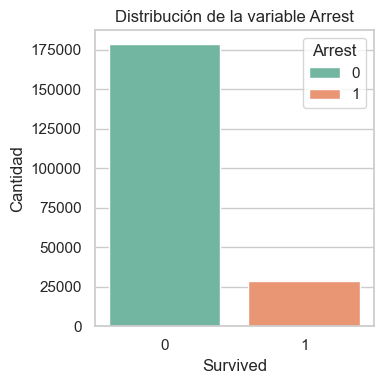

In [ ]:
X = df_cleaned.drop(columns=["Arrest"])
y = df_cleaned["Arrest"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Cantidad de registros en set de Train, Test y Total de registros
print(f"Train: {len(X_train)} registros")
print(f"Test:  {len(X_test)} registros")
print(f"Total: {len(X_train) + len(X_test)} registros")

Train: 207040 registros
Test:  51760 registros
Total: 258800 registros


### Tratamiento de nulos


La cantidad de nulos es bajisima, menos del 1% de los registros presentan nulos en Location Description. Como se encontro previamente, esta variable es MAR ya que los nulos estan relacionados al tipo de crimen "Deceptive Practice" y cuando la variable de "Arrest" es False. En delitos tipo Deceptive Practice (fraudes, engaños, estafas, etc) no se tiene una ubicacion exacta del delito ya que pueden ocurrir ya sea por telefono, emails, la victima reporta desde otro lugar, es decir, se desconoce la ubicacion exacta.

Por tanto, al ser un porcentaje bajisimo de nulos y ser MAR, procedemos a imputar con la nueva categoria "Unknown"

In [469]:
X_train['Location Description'] = (X_train['Location Description']).fillna("Unknown")

X_test['Location Description'] = (X_test['Location Description']).fillna("Unknown")

In [ ]:
#Verificamos
print(X_train.isna().sum())
print(X_test.isna().sum())

IUCR                    0
Primary Type            0
Description             0
Location Description    0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Month                   0
WeekDay                 0
Hour                    0
dtype: int64
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Month                   0
WeekDay                 0
Hour                    0
dtype: int64


### Tratamiento de Balance

Proporción de clases:
Arrest
0    0.862027
1    0.137973
Name: proportion, dtype: float64

Entropía de Shannon: 0.5789064594752273


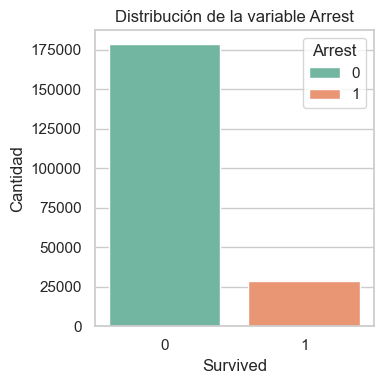

In [477]:
# info(y_train) # datos originales
info(y_train)

El conjunto de datos presenta una proporción altamente asimétrica:
86% de casos sin arresto y 14% con arresto.
Este desbalance afecta la capacidad del modelo para aprender patrones asociados a la clase minoritaria, ya que la clase mayoritaria domina la función de pérdida.

Para evitar introducir sesgos o leakage, las técnicas de balance se aplican solo sobre el conjunto de entrenamiento.
Se seleccionó el uso de class_weight, ya que ajusta la importancia de cada clase durante el entrenamiento sin generar datos artificiales ni eliminar información.
Esta técnica es especialmente apropiada en conjuntos grandes como el de delitos de Chicago y es ampliamente recomendada en contextos de clasificación desbalanceada.

Se optó por ajustar los pesos de clase en lugar de técnicas de muestreo sintético <br>
Razón: Las variables geográficas (Beat, District, Ward) y categóricas del dataset tienen valores discretos específicos que no deben interpolarse <br>
Esto preserva la integridad de los datos mientras compensa el desbalance durante el entrenamiento

Alternativa considerada: SMOTE-NC (SMOTE for Nominal and Continuous) fue evaluada como alternativa, ya que respeta la naturaleza categórica de las variables.